<a href="https://colab.research.google.com/github/laiss33/Stock-Price-Prediction-using-Multilingual-Sentiment-Analysis/blob/main/%5B0%5Ddata_scripting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
# import urlopen
from bs4 import BeautifulSoup
from datetime import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sia
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
html = requests.get('https://companiesmarketcap.com/malaysia/largest-companies-in-malaysia-by-market-cap/').text
soup = BeautifulSoup(html, 'html.parser')
limit=10
companyName = [x.get_text(strip=True) for x in soup.find_all('div', {'class': 'company-name'})][:limit]
print(companyName)

['Maybank', 'PBBank (Public Bank Bhd)', 'CIMB Group', 'PChem (Petronas Chemicals Group)', 'Tenaga Nasional', 'IHH Healthcare', 'Celcomdigi', 'PMetal (Press Metal Aluminium)', '(HLBank) Hong Leong Bank', 'PetGas (Petronas Gas)']


In [13]:
companyCode=[1155,1295,1023,5347,5225,5183,6947,8869,5819,6742]
companySymbol=['1155.KL','1295.KL','1023.KL','5347.KL','5225.KL','5183.KL','6947.KL','8869.KL','5819.KL','6742.KL']
companyName = ['Maybank', 'PBBank (Public Bank Bhd)', 'CIMB Group', 'Tenaga Nasional', 'IHH Healthcare', 'PChem (Petronas Chemicals Group)', 'Celcomdigi', 'PMetal (Press Metal Aluminium)', '(HLBank) Hong Leong Bank', 'YTL Power International']
company=[{'company_code': x, 'company_name': y,'symbol':z}for x, y,z in zip(companyCode, companyName,companySymbol)]
print(company)

[{'company_code': 1155, 'company_name': 'Maybank', 'symbol': '1155.KL'}, {'company_code': 1295, 'company_name': 'PBBank (Public Bank Bhd)', 'symbol': '1295.KL'}, {'company_code': 1023, 'company_name': 'CIMB Group', 'symbol': '1023.KL'}, {'company_code': 5347, 'company_name': 'Tenaga Nasional', 'symbol': '5347.KL'}, {'company_code': 5225, 'company_name': 'IHH Healthcare', 'symbol': '5225.KL'}, {'company_code': 5183, 'company_name': 'PChem (Petronas Chemicals Group)', 'symbol': '5183.KL'}, {'company_code': 6947, 'company_name': 'Celcomdigi', 'symbol': '6947.KL'}, {'company_code': 8869, 'company_name': 'PMetal (Press Metal Aluminium)', 'symbol': '8869.KL'}, {'company_code': 5819, 'company_name': '(HLBank) Hong Leong Bank', 'symbol': '5819.KL'}, {'company_code': 6742, 'company_name': 'YTL Power International', 'symbol': '6742.KL'}]


In [ ]:
from selenium import webdriver

# Starting/Stopping Driver: can specify ports or location but not remote access
from selenium.webdriver.chrome.service import Service as ChromeService

# Manages Binaries needed for WebDriver without installing anything directly
from webdriver_manager.chrome import ChromeDriverManager

# Allows searchs similar to beautiful soup: find_all
from selenium.webdriver.common.by import By

# Try to establish wait times for the page to load
from selenium.webdriver.support.ui import WebDriverWait

# Call Sleep Function to log time of operations
import time

# Random integer for more realistic timing for clicks, buttons and searches during scraping
from random import randint
from selenium.webdriver.common.action_chains import ActionChains

In [ ]:
# Allows you to cusotmize: ingonito mode, maximize window size, headless browser, disable certain features, etc
option= webdriver.ChromeOptions()

# Going undercover:
option.add_argument("--incognito")
option.add_argument("--headless=new")

driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()),
                         options=option)
headlines=[]
start = time.time()
for x in company:
    url = f'https://www.klsescreener.com/v2/news/stock/{x["company_code"]}?offset=2000'
    driver.get(url)
    # load page
    i=1
    while i <= 500:
        p=driver.find_element(By.CLASS_NAME,'figure_loading')
        action = ActionChains(driver)
        action.move_to_element(p).click().perform()
        time.sleep(randint(2, 6))
        substitle = [i.text for i in driver.find_elements(By.XPATH,"(//div[@class='item-title-secondary subtitle']/span)")]
        news_source=[]
        datetime=[]
        for y in range(len(substitle)):
            if y%2 == 0:
                news_source.append(substitle[y])
            else:
                datetime.append(substitle[y])
        datetime=pd.DataFrame(datetime)
        datetime['date_time']=datetime[0].str.split("-", n=1).str[0]
        datetime['date_time'] = pd.to_datetime(datetime['date_time'], format='%d %b, %Y %H:%M%p ')
        time.sleep(randint(2, 6))
        i=i+1
        if min(datetime['date_time']) <= pd.to_datetime('2019-01-01 00:00:00', format='%Y-%m-%d %H:%M:%S'):
            break

    table = [i.text for i in driver.find_elements(By.CLASS_NAME, 'item-title')]
    time.sleep(randint(2, 6))



    for w,y,z in zip(news_source,table,datetime['date_time']):
            headlines.append({"company":x["company_name"],"news_source":w,"news_title": y,"datetime":z})

driver.quit()
end = time.time()

print(end - start,'seconds to complete action!')
print('-----------------------')

15237.614556074142 seconds to complete action!
-----------------------


In [7]:
headlines=pd.DataFrame(headlines)

language = []
for row in headlines['news_source']:
    if row in ('BeritaHarian','HarianMetro') : language.append('Malay')
    elif row in ('Chinapress','Nanyang','Orientaldaily','Sinchew'): language.append('Chinese')
    elif row in ('NST','TheEdge','TheStar'): language.append('English')
    else: language.append('null')
headlines['language']=language
headlines

,company,news_source,news_title,datetime,language
0,YTL Power International,Sinchew,部分股账面值低于海啸期 ‧ 投资马股宜长期部署,2018-10-16 10:50:00,Chinese
1,YTL Power International,TheEdge,Tenaga could gain from future solar installati...,2018-10-23 11:02:00,English
2,YTL Power International,TheStar,Treasury Pulse,2018-10-27 10:12:00,English
3,YTL Power International,TheStar,Treasury Pulse,2018-11-03 08:22:00,English
4,YTL Power International,Orientaldaily,終止IPP合約無影響 電力領域前景續看好,2018-11-04 19:41:00,Chinese
...,...,...,...,...,...
51847,PBBank (Public Bank Bhd)',Sinchew,2023年封关| 39公司市值破百亿 银行股10大占4席,2023-12-30 09:56:00,Chinese
51848,PBBank (Public Bank Bhd)',Nanyang,净利息赚幅难大幅回升 银行股2024上半年乏力,2023-12-30 19:47:00,Chinese
51849,CIMB Group,TheEdge,IILM appoints Mohamad Safri Shahul Hamid as ne...,2023-12-31 14:29:00,English
51850,Maybank,Orientaldaily,旧楼换新楼 Maybank迁入默迪卡118大楼倒计时,2023-12-31 14:42:00,Chinese


In [8]:
headlines.describe(include='all')

,company,news_source,news_title,datetime,language
count,51852,51852,51852,51852,51852
unique,10,9,29321,NaN,3
top,PBBank (Public Bank Bhd)',TheEdge,EVENING 5: Five things you need to know today,NaN,English
freq,9092,22901,180,NaN,30394
mean,NaN,NaN,NaN,2021-10-28 10:46:22.803749120,NaN
min,NaN,NaN,NaN,2018-10-16 10:50:00,NaN
25%,NaN,NaN,NaN,2020-10-05 11:16:00,NaN
50%,NaN,NaN,NaN,2022-01-17 23:08:00,NaN
75%,NaN,NaN,NaN,2022-12-13 09:45:00,NaN
max,NaN,NaN,NaN,2023-12-31 15:13:00,NaN


<ipython-input-9-f8b32b29abde>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


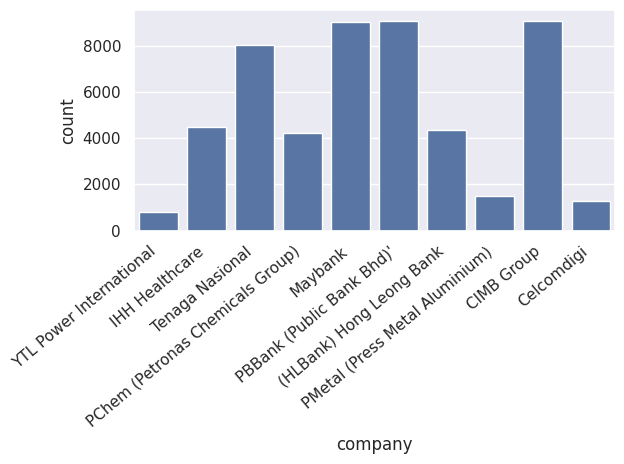

In [9]:

sns.set(style="darkgrid")
ax = sns.countplot(x="company", data=headlines)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

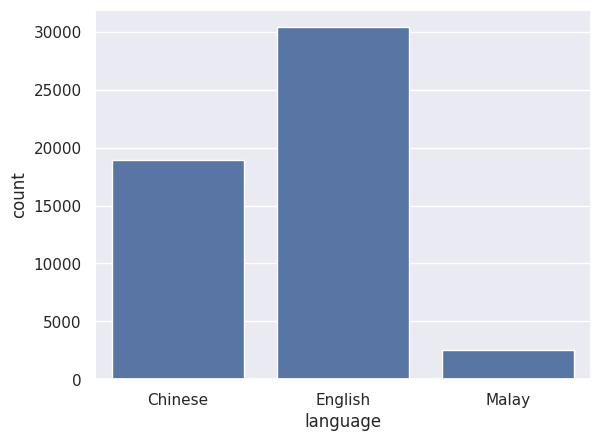

In [10]:
ax = sns.countplot(x="language", data=headlines)

In [11]:
headlines.groupby('company').agg({'datetime': ['min', 'max','nunique']})

datetime                      \
                                                 min                 max   
company                                                                    
(HLBank) Hong Leong Bank         2018-12-31 20:56:00 2023-12-30 09:56:00   
CIMB Group                       2020-06-26 09:40:00 2023-12-31 15:13:00   
Celcomdigi                       2022-07-05 08:21:00 2023-12-30 09:56:00   
IHH Healthcare                   2018-12-24 13:03:00 2023-12-29 00:00:00   
Maybank                          2018-12-31 09:19:00 2023-12-31 14:42:00   
PBBank (Public Bank Bhd)'        2018-12-31 19:10:00 2023-12-30 19:47:00   
PChem (Petronas Chemicals Group) 2018-12-29 10:47:00 2023-12-30 09:56:00   
PMetal (Press Metal Aluminium)   2020-03-04 10:39:00 2023-12-29 12:45:00   
Tenaga Nasional                  2018-12-28 10:00:00 2023-12-30 09:56:00   
YTL Power International          2018-10-16 10:50:00 2023-12-30 09:56:00   

                                          
                                 nunique  
company                                   
(HLBank) Hong Leong Bank            4291  
CIMB Group                          8790  
Celcomdigi                          1257  
IHH Healthcare                      4434  
Maybank                             8894  
PBBank (Public Bank Bhd)'           8986  
PChem (Petronas Chemicals Group)    4165  
PMetal (Press Metal Aluminium)      1489  
Tenaga Nasional                     7896  
YTL Power International              774

In [14]:
import yfinance as yf
import datetime
# startDate , as per our convenience we can modify
startDate = datetime.datetime(2019, 1, 1)

# endDate , as per our convenience we can modify
endDate = datetime.datetime(2023, 12, 31)

# pass the parameters as the taken dates for start and end
company = pd.DataFrame(company)
tickers = yf.Tickers(companySymbol)
tickers_hist = tickers.history(start=startDate,end=endDate)

tickers_hist = tickers_hist.stack(level=1).rename_axis(['Date', 'symbol']).reset_index(level=1)
tickers_hist.reset_index(inplace=True)
tickers_hist = tickers_hist.merge(company, on='symbol', how='left')
tickers_hist

[*********************100%%**********************]  10 of 10 completed


,Date,symbol,Close,Dividends,High,Low,Open,Stock Splits,Volume,company_code,company_name
0,2019-01-02,1023.KL,4.504456,0.0,4.576208,4.480538,4.560263,0.0,6022200,1023,CIMB Group
1,2019-01-02,1155.KL,6.442892,0.0,6.518367,6.436030,6.518367,0.0,4096900,1155,Maybank
2,2019-01-02,1295.KL,4.024759,0.0,4.050873,4.014967,4.050873,0.0,15246000,1295,PBBank (Public Bank Bhd)
3,2019-01-02,5183.KL,7.551876,0.0,7.617260,7.461973,7.609088,0.0,1150400,5183,PChem (Petronas Chemicals Group)
4,2019-01-02,5225.KL,4.959916,0.0,5.062086,4.857745,5.062086,0.0,675200,5225,IHH Healthcare
...,...,...,...,...,...,...,...,...,...,...,...
12245,2023-12-29,5347.KL,9.795122,0.0,9.853659,9.746341,9.746341,0.0,3002900,5347,Tenaga Nasional
12246,2023-12-29,5819.KL,18.655687,0.0,18.714911,18.438532,18.556980,0.0,1446700,5819,(HLBank) Hong Leong Bank
12247,2023-12-29,6742.KL,2.540000,0.0,2.600000,2.520000,2.540000,0.0,21301200,6742,YTL Power International
12248,2023-12-29,6947.KL,4.046636,0.0,4.106145,4.036718,4.096227,0.0,1971700,6947,Celcomdigi


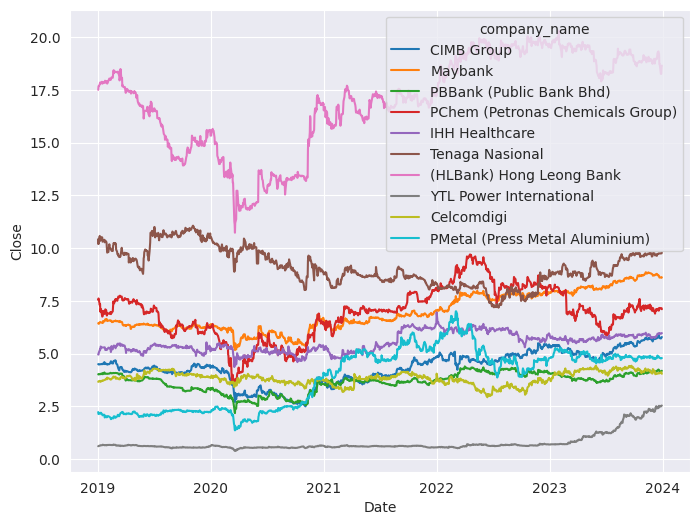

In [ ]:
plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")
sns.lineplot(x='Date',y='Close',data = tickers_hist,hue='company_name')
plt.show()

In [ ]:
# headlines[(headlines.company=='Maybank')]
headlines.to_excel('5year_news.xlsx')
tickers_hist.to_excel('5year_historical_price.xlsx')

<ipython-input-74-3d23959a01b7>:2: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  headlines.to_excel('news.xlsx')
<ipython-input-74-3d23959a01b7>:3: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  tickers_hist.to_excel('historical_price.xlsx')
